In [149]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [150]:
df = pd.read_csv("NTAD_Fatality_Analysis_Reporting_System_2023_Accidents.csv")
df.head()

,OBJECTID,STATE,STATENAME,ST_CASE,PEDS,PERNOTMVIT,VE_TOTAL,VE_FORMS,PVH_INVL,PERSONS,...,ARR_HOURNAME,ARR_MIN,ARR_MINNAME,HOSP_HR,HOSP_HRNAME,HOSP_MN,HOSP_MNNAME,FATALS,x,y
0,1,1,Alabama,10001,0,0,1,1,0,1,...,10:00pm-10:59pm,45,45,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,-9.633459e+06,3.753860e+06
1,2,1,Alabama,10002,0,0,1,1,0,1,...,2:00am-2:59am,23,23,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,-9.826529e+06,3.569113e+06
2,3,1,Alabama,10003,0,0,1,1,0,1,...,11:00pm-11:59pm,8,8,88,Not Applicable (Not Transported),88,Not Applicable (Not Transported),1,-9.615313e+06,4.128378e+06
3,4,1,Alabama,10004,0,0,1,1,0,3,...,7:00pm-7:59pm,44,44,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,-9.656598e+06,3.634669e+06
4,5,1,Alabama,10005,0,0,1,1,0,4,...,3:00pm-3:59pm,8,8,99,Unknown,99,Unknown EMS Hospital Arrival Time,1,-9.756463e+06,3.636309e+06


In [151]:
df_new = df.copy()

In [152]:
df_new["date_crash"] = pd.to_datetime(dict(year=df_new["YEAR"], month=df_new["MONTH"], day=df_new["DAY"]))
df_new[['date_crash','YEAR','MONTH','DAY']]


,date_crash,YEAR,MONTH,DAY
0,2023-01-04,2023,1,4
1,2023-03-20,2023,3,20
2,2023-03-18,2023,3,18
3,2023-03-17,2023,3,17
4,2023-03-17,2023,3,17
...,...,...,...,...
37946,2023-06-22,2023,6,22
37947,2023-07-30,2023,7,30
37948,2023-09-15,2023,9,15
37949,2023-09-23,2023,9,23


In [153]:
df["HOUR"].value_counts()

HOUR
20    2330
21    2304
18    2247
19    2213
17    2117
22    1992
16    1860
15    1807
14    1736
23    1693
0     1495
13    1461
2     1449
12    1403
1     1374
6     1362
5     1284
7     1168
11    1161
3     1132
10    1114
4     1033
9      994
8      940
99     282
Name: count, dtype: int64

In [154]:
# This will count the occurrences in the "MINUTE" column and then sort the index in descending alphabetical order
result = df["MINUTE"].value_counts().sort_index(ascending=False)
result                                             

MINUTE
99     282
59     456
58     523
57     516
56     463
      ... 
4      544
3      477
2      495
1      473
0     1770
Name: count, Length: 61, dtype: int64

In [155]:
df[['HOUR','MINUTE']]

,HOUR,MINUTE
0,22,20
1,2,0
2,22,56
3,19,0
4,14,55
...,...,...
37946,11,35
37947,21,20
37948,14,0
37949,11,43


In [156]:
# Drop rows where HOUR == 99 and MINUTE == 99
df_new = df_new[~((df_new['HOUR'] == 99) & (df_new['MINUTE'] == 99))]

# Create a new column 'TIME' formatted as HH:MM (with leading zeros)
df_new['tm_crash'] = df_new['HOUR'].astype(str).str.zfill(2) + ':' + df_new['MINUTE'].astype(str).str.zfill(2)

# Display the new column along with HOUR and MINUTE
df_new[['HOUR', 'MINUTE', 'tm_crash']]

,HOUR,MINUTE,tm_crash
0,22,20,22:20
1,2,0,02:00
2,22,56,22:56
3,19,0,19:00
4,14,55,14:55
...,...,...,...
37946,11,35,11:35
37947,21,20,21:20
37948,14,0,14:00
37949,11,43,11:43


In [157]:
df_new[['date_crash','YEAR','MONTH','DAY','HOUR', 'MINUTE', 'tm_crash']].head()

,date_crash,YEAR,MONTH,DAY,HOUR,MINUTE,tm_crash
0,2023-01-04,2023,1,4,22,20,22:20
1,2023-03-20,2023,3,20,2,0,02:00
2,2023-03-18,2023,3,18,22,56,22:56
3,2023-03-17,2023,3,17,19,0,19:00
4,2023-03-17,2023,3,17,14,55,14:55


In [158]:
# Create a new datetime column by combining 'date_crash' and 'tm_crash'
df_new['datetime_crash'] = pd.to_datetime(df_new['date_crash'].astype(str) + ' ' + df_new['tm_crash'], errors='coerce')
df_new[['date_crash','tm_crash','datetime_crash']].head()

,date_crash,tm_crash,datetime_crash
0,2023-01-04,22:20,2023-01-04 22:20:00
1,2023-03-20,02:00,2023-03-20 02:00:00
2,2023-03-18,22:56,2023-03-18 22:56:00
3,2023-03-17,19:00,2023-03-17 19:00:00
4,2023-03-17,14:55,2023-03-17 14:55:00


In [159]:
df["NOT_HOUR"].value_counts()

NOT_HOUR
99    20148
19     1059
20     1056
17     1046
18     1031
21      993
16      918
22      893
14      875
15      859
13      723
12      710
23      702
0       679
2       640
11      617
7       601
1       599
6       590
10      568
5       567
9       523
3       504
8       485
4       434
88      131
Name: count, dtype: int64

In [160]:
df["NOT_MIN"].value_counts()

NOT_MIN
99    17943
98     3185
0       371
30      352
35      333
      ...  
19      243
48      240
59      239
43      238
88      131
Name: count, Length: 63, dtype: int64

In [161]:
df[df["NOT_HOUR"] == 99]['OBJECTID'].count()

np.int64(20148)

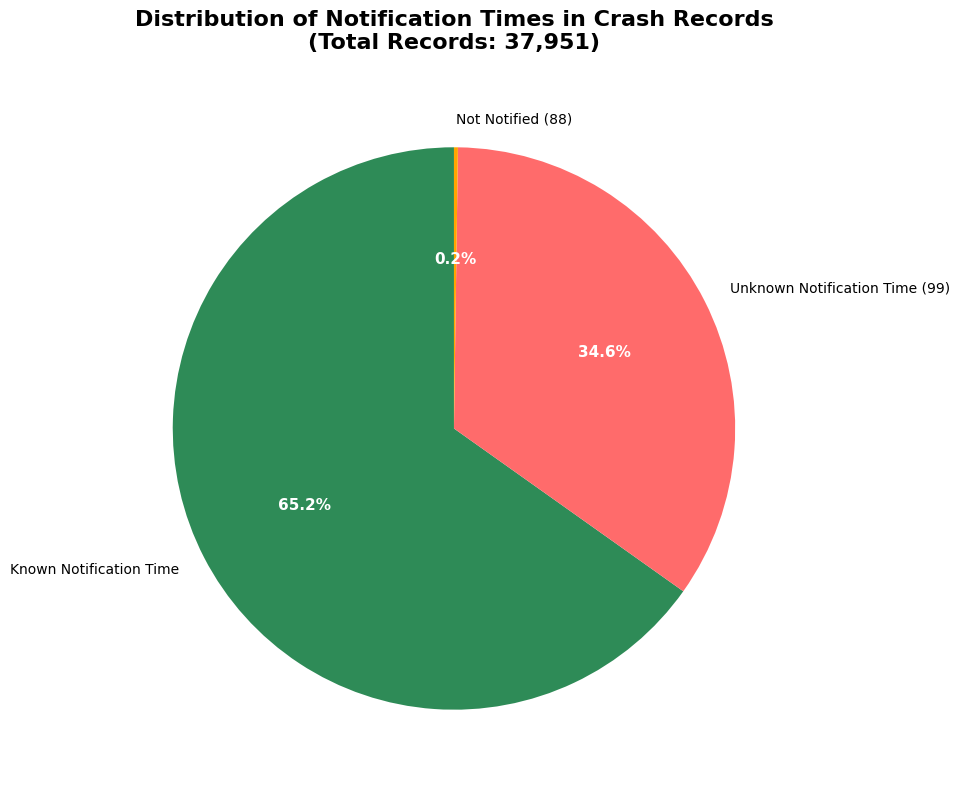

In [162]:
import matplotlib.pyplot as plt
import pandas as pd

# Create data for the pie chart
notification_data = {
    'Known Notification Time': df['OBJECTID'].count(),
    'Unknown Notification Time (99)': df[df["NOT_HOUR"] == 99]['OBJECTID'].count(),
    'Not Notified (88)': df[df["NOT_HOUR"] == 88]['OBJECTID'].count()
}

# Create pie chart
plt.figure(figsize=(10, 8))
colors = ['#2E8B57', '#FF6B6B', '#FFA500']  # Green, Red, Orange
wedges, texts, autotexts = plt.pie(
    notification_data.values(), 
    labels=notification_data.keys(),
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    # explode=(0.05, 0.05, 0.01)  # Slightly separate the slices
)

# Enhance the appearance
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

plt.title('Distribution of Notification Times in Crash Records\n(Total Records: 37,951)', 
          fontsize=16, fontweight='bold', pad=20)

# Add count annotations
for i, (label, count) in enumerate(notification_data.items()):
    plt.annotate(f'Count: {count:,}', 
                xy=(1.3, 0.8 - i*0.15), 
                fontsize=12, 
                bbox=dict(boxstyle="round,pad=0.1", facecolor=colors[i], alpha=0.7))

plt.tight_layout()
plt.show()

In [163]:
# Drop rows where NOT_HOUR < 24 and NOT_MINUTE < 60
df_new = df_new[((df_new['NOT_HOUR'] < 24) & (df_new['NOT_MIN'] < 60))]
# Create a new column 'NOT_TIME' formatted as HH:MM (with leading zeros)
df_new['not_tm_crash'] = df_new['NOT_HOUR'].astype(str).str.zfill(2) + ':' + df_new['NOT_MIN'].astype(str).str.zfill(2)
# Display the new column along with NOT_HOUR and NOT_MIN
df_new[['NOT_HOUR', 'NOT_MIN', 'not_tm_crash']]

,NOT_HOUR,NOT_MIN,not_tm_crash
0,22,20,22:20
1,2,8,02:08
2,22,48,22:48
3,19,0,19:00
4,14,53,14:53
...,...,...,...
37922,6,55,06:55
37933,1,18,01:18
37935,7,0,07:00
37937,6,30,06:30


In [164]:
df_new[['OBJECTID','tm_crash','not_tm_crash']].head()

,OBJECTID,tm_crash,not_tm_crash
0,1,22:20,22:20
1,2,02:00,02:08
2,3,22:56,22:48
3,4,19:00,19:00
4,5,14:55,14:53


In [165]:
# Method: Handle day crossing only around midnight times
df_new['datetime_crash'] = pd.to_datetime(df_new['date_crash'].astype(str) + ' ' + df_new['tm_crash'])
df_new['datetime_not_crash'] = pd.to_datetime(df_new['date_crash'].astype(str) + ' ' + df_new['not_tm_crash'])

# Calculate initial time difference
df_new['time_notified'] = df_new['datetime_not_crash'] - df_new['datetime_crash']

# Only adjust for day crossing if:
# 1. Notification appears before crash (negative time)
# 2. Crash happened late at night (after 20:00/8 PM)
# 3. Notification happened early morning (before 08:00/8 AM)
crash_late_night = df_new['datetime_crash'].dt.hour >= 20
notif_early_morning = df_new['datetime_not_crash'].dt.hour <= 8
is_midnight_crossing = crash_late_night & notif_early_morning & (df_new['time_notified'] < pd.Timedelta(0))

# Add one day to notification time for midnight crossing cases
df_new.loc[is_midnight_crossing, 'datetime_not_crash'] = df_new.loc[is_midnight_crossing, 'datetime_not_crash'] + pd.Timedelta(days=1)

# Recalculate time difference
df_new['time_notified'] = df_new['datetime_not_crash'] - df_new['datetime_crash']

# Drop remaining records with negative time (likely data errors)
df_new = df_new[df_new['time_notified'] >= pd.Timedelta(0)]

print(f"Records remaining: {len(df_new)}")
print(f"Midnight crossing cases handled: {is_midnight_crossing.sum()}")

Records remaining: 14239
Midnight crossing cases handled: 63


In [166]:
df_new[['datetime_crash','datetime_not_crash','time_notified']].head()

,datetime_crash,datetime_not_crash,time_notified
0,2023-01-04 22:20:00,2023-01-04 22:20:00,0 days 00:00:00
1,2023-03-20 02:00:00,2023-03-20 02:08:00,0 days 00:08:00
3,2023-03-17 19:00:00,2023-03-17 19:00:00,0 days 00:00:00
6,2023-03-16 05:25:00,2023-03-16 05:31:00,0 days 00:06:00
7,2023-03-15 11:12:00,2023-03-15 11:12:00,0 days 00:00:00


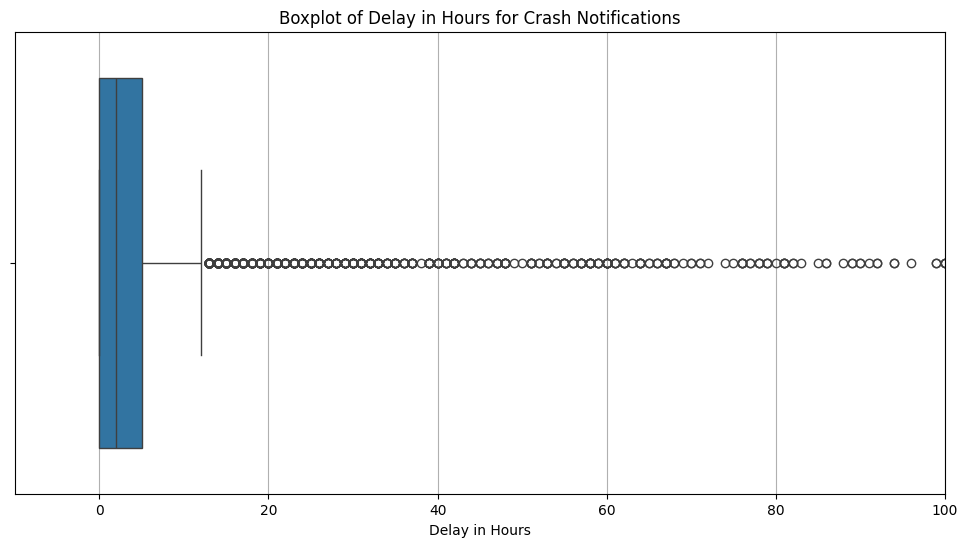

In [ ]:
#find delay in hours
df_new['delay_hours'] = df_new['time_notified'].dt.total_seconds() / 60
#boxplot of delay in hours
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_new['delay_hours'])
plt.title('Boxplot of Delay in Hours for Crash Notifications')
plt.xlabel('Delay in Hours')
plt.xlim(-10, 100)  # Set x-axis limits to focus on reasonable delays
plt.grid(axis='x')
plt.show()

In [171]:
df_new['delay_hours'].describe()

count    14239.000000
mean         7.874008
std         44.129752
min          0.000000
25%          0.000000
50%          2.000000
75%          5.000000
max       1428.000000
Name: delay_hours, dtype: float64

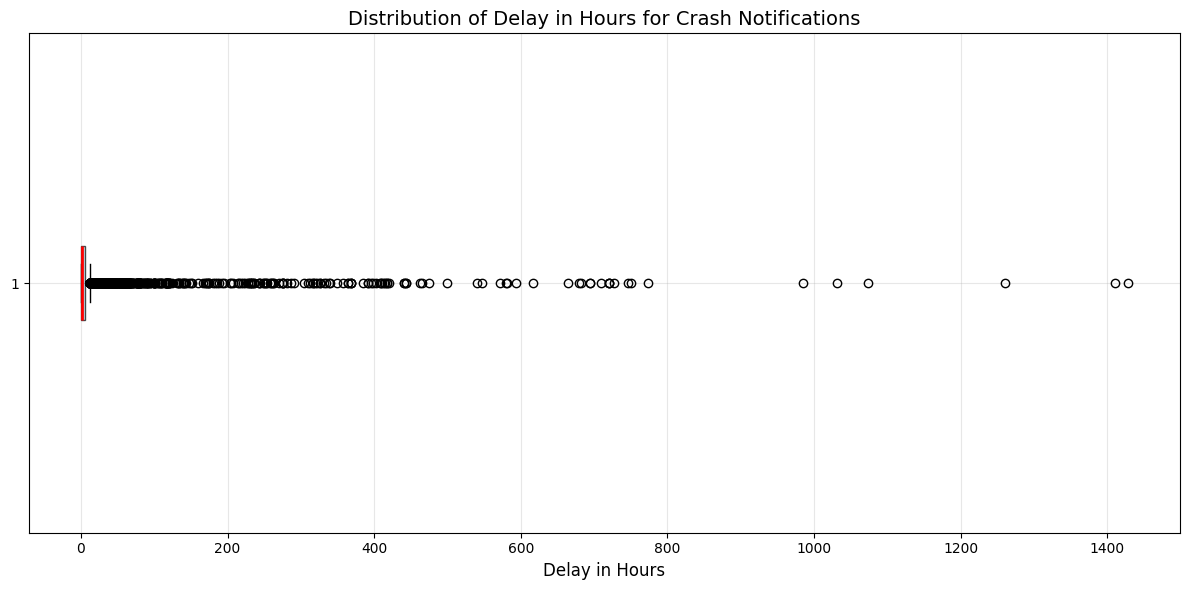

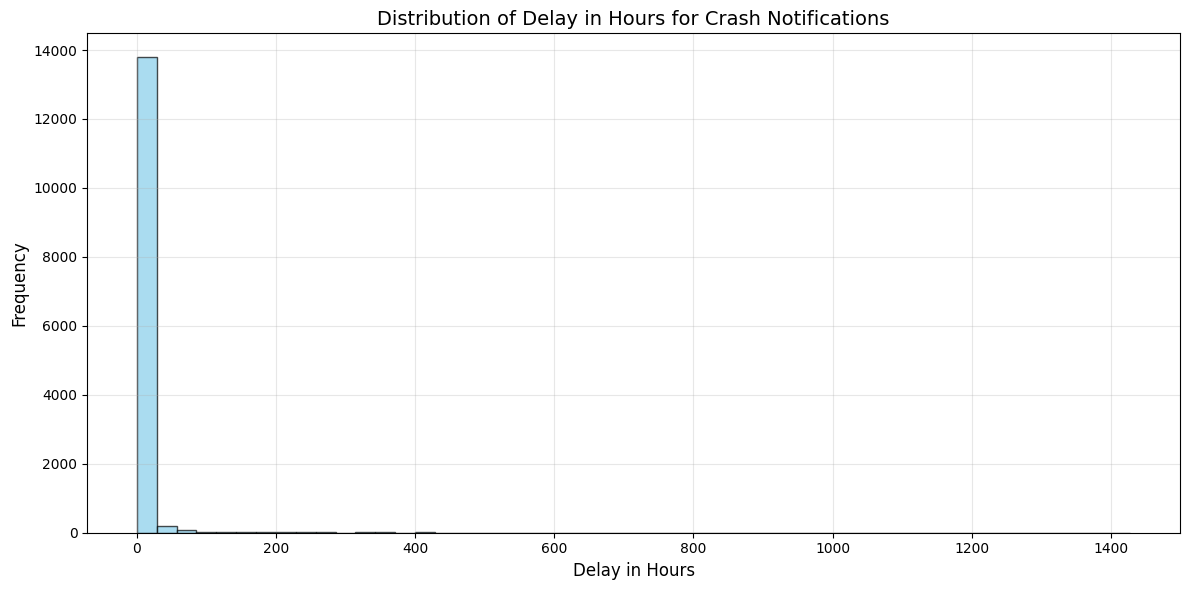

Delay Statistics:
count    14239.000000
mean         7.874008
std         44.129752
min          0.000000
25%          0.000000
50%          2.000000
75%          5.000000
max       1428.000000
Name: delay_hours, dtype: float64


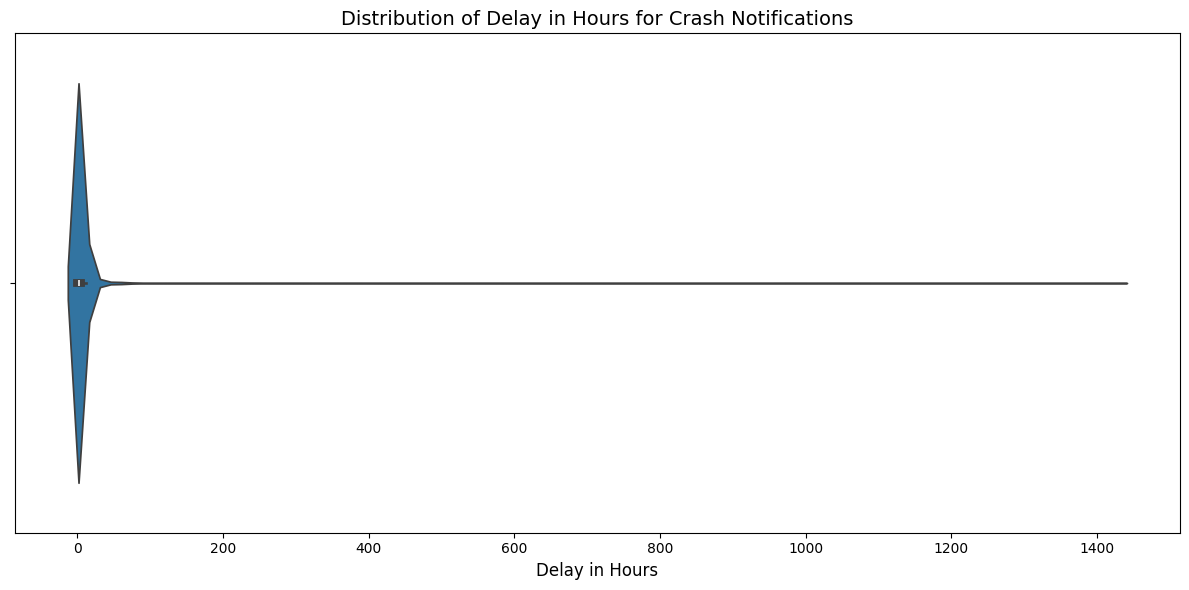

In [172]:
# Option 1: Horizontal boxplot with better formatting
plt.figure(figsize=(12, 6))
bp = plt.boxplot(df_new['delay_hours'].dropna(), vert=False, patch_artist=True, 
                 boxprops=dict(facecolor='lightblue', alpha=0.7),
                 medianprops=dict(color='red', linewidth=2))
plt.xlabel('Delay in Hours', fontsize=12)
plt.title('Distribution of Delay in Hours for Crash Notifications', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Option 2: Histogram for better readability
plt.figure(figsize=(12, 6))
plt.hist(df_new['delay_hours'].dropna(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Delay in Hours', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Delay in Hours for Crash Notifications', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Option 3: Summary statistics table
delay_stats = df_new['delay_hours'].describe()
print("Delay Statistics:")
print(delay_stats)

# Option 4: Violin plot for better distribution view
plt.figure(figsize=(12, 6))
import seaborn as sns
sns.violinplot(x=df_new['delay_hours'].dropna(), orient='h')
plt.xlabel('Delay in Hours', fontsize=12)
plt.title('Distribution of Delay in Hours for Crash Notifications', fontsize=14)
plt.tight_layout()
plt.show()

In [173]:
df_new.to_csv("Processed_Fatality.csv", index=False)